In [1]:
import requests
import base64

In [2]:
f = open('123.jpg','rb') 
body = f.read() 
f.close()
#load image

In [3]:
headers = {
    # Request headers
    'Content-type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': '07ecc20b5e0f4c01b3b62196a116fee6',
}
params = "?returnFaceId=true&returnFaceLandmarks=false&returnFaceAttributes=age,gender"

In [7]:
r = requests.post('https://westus.api.cognitive.microsoft.com/face/v1.0/detect'+params,data = body,headers = headers)
print(r.status_code)
print(r.json())
faces = r.json()

200
[{'faceId': 'dbedbd85-1603-45b0-a2b5-ee2dafb8287f', 'faceRectangle': {'top': 63, 'left': 306, 'width': 102, 'height': 102}, 'faceAttributes': {'gender': 'male', 'age': 28.1}}]


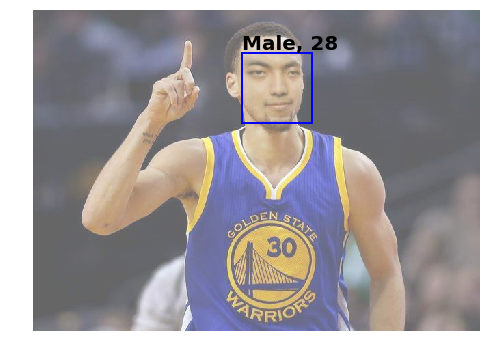

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib import patches
from io import BytesIO

image = Image.open('123.jpg')


plt.figure(figsize=(8,8))
ax = plt.imshow(image, alpha=0.6)
for face in faces:
    fr = face["faceRectangle"]
    fa = face["faceAttributes"]
    origin = (fr["left"], fr["top"])
    p = patches.Rectangle(origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
    plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]), fontsize=20, weight="bold", va="bottom")
_ = plt.axis("off")